In [ ]:
#Jawad's streamlit hospital predictor link:
"""https://jawadwisconsin.streamlit.app"""

In [22]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wisoncin/data.csv
/kaggle/input/2d-datasets/Jain.txt
/kaggle/input/2d-datasets/Pathbased.txt
/kaggle/input/2d-datasets/Spiral.txt
/kaggle/input/2d-datasets/Flame.txt
/kaggle/input/2d-datasets/Aggregation.txt
/kaggle/input/2d-datasets/Compound.txt
/kaggle/input/cancerbreastwisconsin/wdbc.names
/kaggle/input/cancerbreastwisconsin/wdbc.data


In [25]:

 #Import the dataset
df = pd.read_csv('/kaggle/input/wisoncin/data.csv')
 # Checking the dataset
df = df.drop(['id', 'Unnamed: 32'], axis=1, errors='ignore')
df['diagnosis'] = df['diagnosis'].map({'M':1, 'B':0})
print(df.isnull().sum())
df.head()
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

#  Feature selection: pick top 5 features using ANOVA F-test
selector = SelectKBest(score_func=f_classif, k=5)
X_top5 = selector.fit_transform(X, y)

# Get names of selected features
selected_features = X.columns[selector.get_support()]
print("Top 5 Selected Features:", list(selected_features))

#  Scale the selected features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_top5)

# Now X_scaled contains the top 5 scaled features, and y is the target
print("Shape of X_scaled:", X_scaled.shape)
print("Shape of y:", y.shape)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64
Top 5 Selected Features: ['perimeter_mean', 'concave points_mean', 'radius_worst', 'peri

In [27]:
 #linear:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Linear SVM
linear_svm = SVC(kernel='linear', C=1.0)  # C=1.0 is default regularization
linear_svm.fit(X_train, y_train)
y_pred = linear_svm.predict(X_test)
y_pred = linear_svm.predict(X_test)
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9649122807017544
Confusion Matrix:
 [[69  2]
 [ 2 41]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



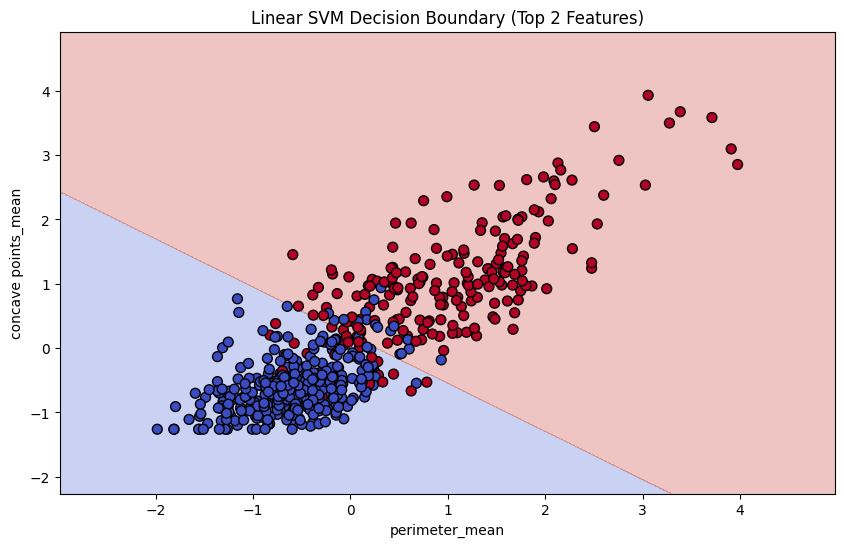

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC

#  Select top 2 features for visualization
X_vis = X_scaled[:, :2]  # using the first 2 features of your scaled top 5
y_vis = y.values

# Train a linear SVM on these 2 features
svm_2d = SVC(kernel='linear', C=1.0)
svm_2d.fit(X_vis, y_vis)

# Create a mesh grid to plot decision boundary
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict on each point in the grid
Z = svm_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

#  Plot
plt.figure(figsize=(10,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_vis, s=50, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel(selected_features[0])
plt.ylabel(selected_features[1])
plt.title("Linear SVM Decision Boundary (Top 2 Features)")
plt.show()


In [30]:
#rbf kernel
from sklearn.svm import SVC

svc_model = SVC(kernel="rbf")
svc_model.fit(X_train, y_train)
predictions5 = svc_model.predict(X_test)
print("Confusion Matrix: \n", confusion_matrix(y_test, predictions5))
print("\n")
print(classification_report(y_test, predictions5))
svm_acc = accuracy_score(y_test, predictions5)
print("Accuracy of SVM model is: ", svm_acc)


Confusion Matrix: 
 [[70  1]
 [ 4 39]]


              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Accuracy of SVM model is:  0.956140350877193


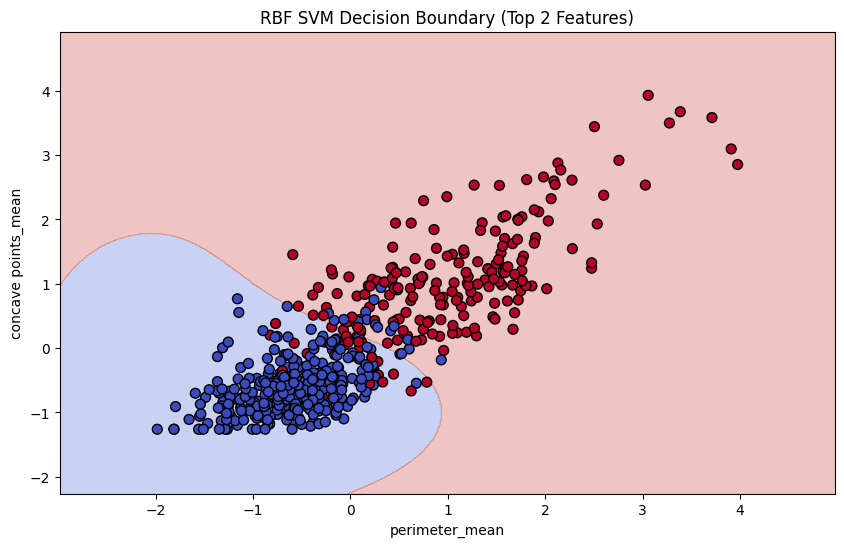

In [31]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC

#  Use top 2 features for visualization (same as linear SVM)
X_vis = X_scaled[:, :2]  # using first 2 features of your top 5 scaled features
y_vis = y.values

#  Train SVM with RBF kernel on these 2 features
svm_rbf = SVC(kernel='rbf', gamma='scale', C=1.0)
svm_rbf.fit(X_vis, y_vis)

# Create a mesh grid for plotting
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict for each point in the grid
Z = svm_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

#  Plot the decision boundary and points
plt.figure(figsize=(10,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_vis, s=50, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel(selected_features[0])
plt.ylabel(selected_features[1])
plt.title("RBF SVM Decision Boundary (Top 2 Features)")
plt.show()


In [34]:
import joblib

# Save the RBF SVM model and scaler
joblib.dump(svc_model, "svm_rbf_model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(selected_features, "selected_features.pkl")  # top 5 features


['selected_features.pkl']